## Multi Armed Bandits Simulation
In this assignment you will simulate multi-armed bandits with different behaviours using numpy, there are a total of 3 different behaviours:
- One with probabilistic behaviour, which gives different outputs with a probability
- One which gives you a noisy reward, for each input

Note : All the rewards (or mean rewards) should be randomly generated and should not be hardcoded

In [1]:
# Import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt

The probabilistic behaviour means for each of the arms there will be a randomly generated set of rewards, {r_1, r_2, ..., r_k} and randomly generated set of probabilities {p_1, p_2, ..., p_k}. After pulling any arm, you should choose one of the rewards in its reward set with its corresponding probability and return it. The choice of value of k is upto you, but you will need numpy for k > 2.

In [2]:
class MAB_probabilistic:
    def __init__(self, num_action : int = 10, k : int = 5) -> None:
        self.probabilities = np.empty((0,k))
        self.rewards = np.empty((0,k))
        for i in range(num_action):
            new_prob = np.random.rand(k)
            new_prob = new_prob/np.sum(new_prob)
            new_rew = np.random.rand(k)
            dictionary = dict(zip(new_prob, new_rew))
            new_prob = np.sort(new_prob)
            new_rew = np.array([])
            for i in range(len(new_prob)):
                new_rew = np.append(new_rew, dictionary[new_prob[i]])
            cum_sum = new_prob[0]
            for i in range(1, len(new_prob)):
                cum_sum += new_prob[i]
                new_prob[i] = cum_sum
            self.probabilities = np.vstack([self.probabilities, new_prob])
            self.rewards = np.vstack([self.rewards, new_rew])
            
    def act(self, action : int) -> float:
        random_num = np.random.rand()
        return self.rewards[action][np.searchsorted(self.probabilities[action], random_num)]


The noisy policy means for each arm, you should return a reward chosen from an underlying probability distribution (like gaussian, you can use numpy for this purpose) with a randomly generated mean and the given variance (passed to \_\_init\_\_)

In [3]:
class MAB_noisy:
    def __init__(self, noise_variance : float, num_action : int = 10) -> None:
        self.std_dev = np.sqrt(noise_variance)

    def act(self, action : int) -> float:
        mean = np.random.rand()
        return np.random.normal(mean, self.std_dev)

Initialize MAB_probabilistic with number of actions 5.
Perform an action for a fixed number of time and plot the average of first n rewards against n. Make such graphs for all 5 actions in single plot.

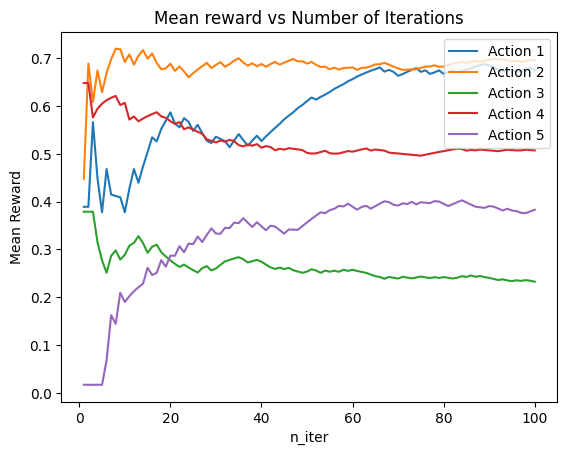

In [4]:
# Let each action be called 10 times
num_action = 5
k = 5
mab = MAB_probabilistic(num_action, k)
num_calls = 100
max = 0
bestAction = -1
for action in range(num_action):
    reward = np.array([])
    totalSum = 0
    for call in range(1,num_calls+1):
        totalSum += mab.act(action)
        reward = np.append(reward, totalSum/call)
    average = totalSum/num_calls
    if average > max:
        max = average
        bestAction = action
    n = np.arange(1, num_calls+1)
    plt.plot(n, reward, label=f'Action {action+1}')
plt.title("Mean reward vs Number of Iterations")
plt.xlabel('n_iter')
plt.ylabel('Mean Reward')
plt.legend(loc='upper right')
plt.show()


Initialize MAB_noisy with number of actions 5.
Perform an action for a fixed number of time and plot the nth rewards against n. Make such graphs for all 5 actions in single plot.

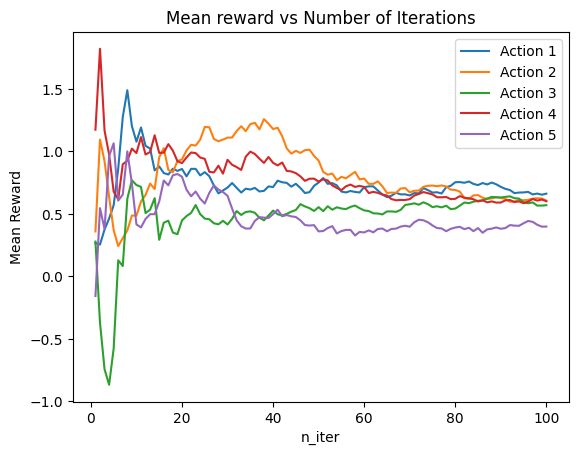

In [5]:
num_action = 5
num_calls = 100
variance = 2.0
mab_noisy = MAB_noisy(variance, num_action)
for action in range(num_action):
    reward = np.array([])
    totalSum = 0
    for call in range(1,num_calls+1):
        totalSum += mab_noisy.act(action)
        reward = np.append(reward, totalSum/call)
    n = np.arange(1, num_calls+1)
    plt.plot(n, reward, label=f'Action {action+1}')

plt.title("Mean reward vs Number of Iterations")
plt.xlabel('n_iter')
plt.ylabel('Mean Reward')
plt.legend(loc='upper right')
plt.show()


Optional : Initialize any one of the above classes and find the optimal action, you can only use act() function and cannot access any class variables. Please do not search for methods on google or anywhere else, this is just a simple exercise for your own thinking.

In [6]:
# I have incorporated this part above only. The result given below is in agreement with the graph above.
print(f'The optimal action is Action {bestAction+1}')

The optimal action is Action 2
